{'levenshtein_distance': 348.3131868131868, 'codebleu': 0.47961337265954684, 'ngram_match_score': 0.26853186614520946, 'weighted_ngram_match_score': 0.3642512376545606, 'syntax_match_score': 0.6029756961213584, 'dataflow_match_score': 0.6250023830247514, 'levenshtein_distance_std': 480.0952066085701, 'codebleu_std': 0.2362697305109746, 'ngram_match_score_std': 0.30803362359403685, 'weighted_ngram_match_score_std': 0.34800628353220425, 'syntax_match_score_std': 0.27089473521854585, 'dataflow_match_score_std': 0.31970789401611593}
{'levenshtein_distance': 417.702479338843, 'codebleu': 0.45995642461043246, 'ngram_match_score': 0.26453015008607583, 'weighted_ngram_match_score': 0.3501436060264565, 'syntax_match_score': 0.5499151412028909, 'dataflow_match_score': 0.584327710217216, 'levenshtein_distance_std': 486.8384198259688, 'codebleu_std': 0.23675528808629728, 'ngram_match_score_std': 0.2797817849148288, 'weighted_ngram_match_score_std': 0.32589763925457654, 'syntax_match_score_std': 0.

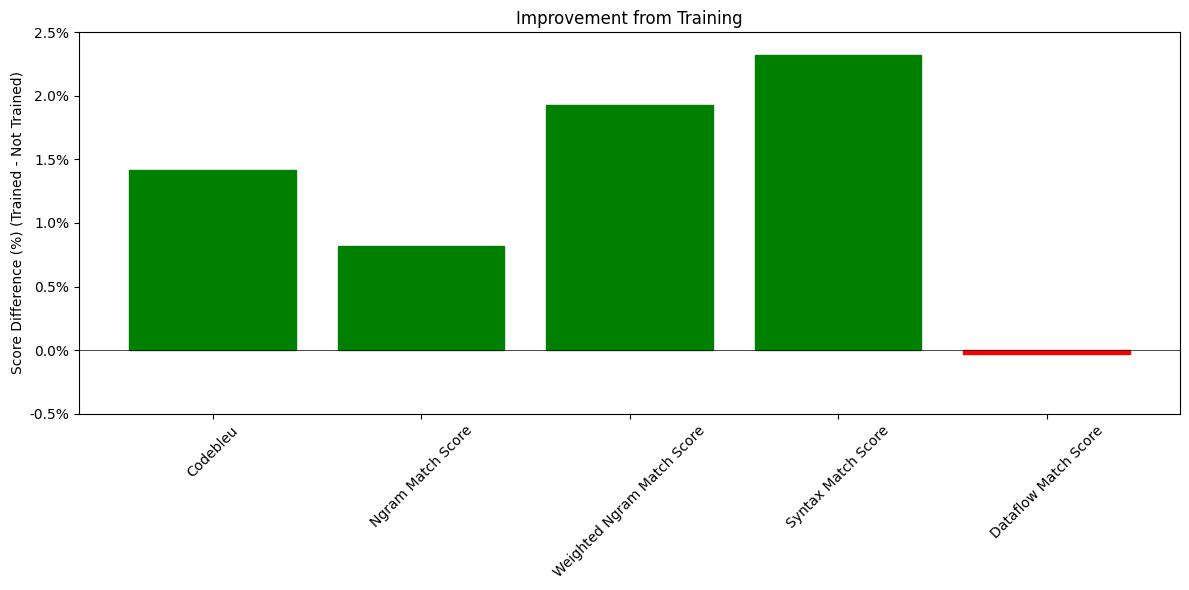

Aggregated metrics saved to 'results/aggregated_metrics.csv'
Plot saved to 'results/improvement_plot.png'

LaTeX Table Code:

\begin{table}[h]
\centering
\begin{tabular}{lcc}
\toprule
Metric & Trained Model & Not Trained Model \\
\midrule
CodeBLEU & 47.2\% ± 1.0\% & 45.8\% ± 3.2\% \\
N-gram Match & 26.3\% ± 0.6\% & 25.5\% ± 5.5\% \\
Weighted N-gram & 37.9\% ± 3.9\% & 36.0\% ± 6.9\% \\
Syntax Match & 56.0\% ± 3.9\% & 53.7\% ± 4.0\% \\
Dataflow Match & 60.7\% ± 2.1\% & 60.7\% ± 3.5\% \\
\bottomrule
\end{tabular}
\caption{Comparison of model performance metrics}
\label{tab:model-comparison}
\end{table}



In [12]:
import os
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt



def load_metrics_from_directory(directory_path):
    """Load all JSON metrics files from a directory and its subdirectories."""
    metrics_data = []
    #rewrite with listdir
    #find all jsons like dataset_name/metrics/results.json
    for file in os.listdir(directory_path):
        json_path = os.path.join(directory_path, file, "metrics", "results.json")
        if os.path.exists(json_path):
            # read json
            with open(json_path, 'r') as f:
                data = json.load(f)
                print(data)
                data['dataset_name'] = file
                metrics_data.append(data)
    return pd.DataFrame(metrics_data)

# Load metrics for both categories
trained_metrics = load_metrics_from_directory('results/trained_hugest')

not_trained_metrics = load_metrics_from_directory('results/not_trained_hugest')

print("Trained Hugest Metrics Shape:", trained_metrics.shape)
print("Not Trained Hugest Metrics Shape:", not_trained_metrics.shape)
# aggregate just metrics
#   "codebleu"
#   "ngram_match_score"
#   "weighted_ngram_match_score"
#   "syntax_match_score"
#   "dataflow_match_score"

def calculate_aggregate_metrics(df):
    """Calculate aggregate metrics for a dataframe."""
    metrics = [
        "levenshtein_distance",
        "codebleu",
        "ngram_match_score", 
        "weighted_ngram_match_score",
        "syntax_match_score",
        "dataflow_match_score"
    ]
    
    agg_metrics = {}
    for metric in metrics:
        agg_metrics[f'{metric}_mean'] = df[metric].mean()
    
    return pd.Series(agg_metrics)

# Calculate aggregate metrics for both categories
trained_agg = calculate_aggregate_metrics(trained_metrics)
not_trained_agg = calculate_aggregate_metrics(not_trained_metrics)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Trained Hugest': trained_agg,
    'Not Trained Hugest': not_trained_agg
})

# Visualize the comparison
plt.figure(figsize=(12, 6))

metrics_to_plot = [
    'codebleu',
    'ngram_match_score',
    'weighted_ngram_match_score', 
    'syntax_match_score',
    'dataflow_match_score'
]

x = np.arange(len(metrics_to_plot))

# Calculate deltas (Trained - Not Trained)
deltas = [comparison_df['Trained Hugest'][f'{m}_mean'] - 
          comparison_df['Not Trained Hugest'][f'{m}_mean'] 
          for m in metrics_to_plot]

# Create bar plot of deltas
bars = plt.bar(x, deltas)

# Color bars based on positive/negative values
for bar, delta in zip(bars, deltas):
    if delta >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Score Difference (%) (Trained - Not Trained)')
plt.title('Improvement from Training')
plt.xticks(x, [m.replace('_', ' ').title() for m in metrics_to_plot], rotation=45)
plt.yticks(plt.yticks()[0], [f'{round(y*100, 2)}%' for y in plt.yticks()[0]])
plt.tight_layout()

# Save plot
plt.savefig('results/improvement_plot.png')
plt.show()

# Save aggregated results
comparison_df.to_csv('results/aggregated_metrics.csv')

print("Aggregated metrics saved to 'results/aggregated_metrics.csv'")
print("Plot saved to 'results/improvement_plot.png'")

# Generate LaTeX table code
latex_rows = []

metrics_display = {
    'codebleu': 'CodeBLEU',
    'ngram_match_score': 'N-gram Match',
    'weighted_ngram_match_score': 'Weighted N-gram', 
    'syntax_match_score': 'Syntax Match',
    'dataflow_match_score': 'Dataflow Match'
}

for metric in metrics_to_plot:
    trained_mean = comparison_df['Trained Hugest'][f'{metric}_mean'] * 100
    not_trained_mean = comparison_df['Not Trained Hugest'][f'{metric}_mean'] * 100
    latex_rows.append(f"{metrics_display[metric]} & {trained_mean:.1f}\\% & {not_trained_mean:.1f}\\% \\\\")

latex_table = """
\\begin{table}[h]
\\centering
\\begin{tabular}{lcc}
\\toprule
Metric & Trained Model & Not Trained Model \\\\
\\midrule
""" + "\n".join(latex_rows) + """
\\bottomrule
\\end{tabular}
\\caption{Comparison of model performance metrics}
\\label{tab:model-comparison}
\\end{table}
"""

print("\nLaTeX Table Code:")
print(latex_table)
